# Happy Customers

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges. We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can **predict what makes our customers happy or unhappy, we can then take necessary actions.**

**Goals:** The goal of this project is to predict customer happiness/unhappiness based on their rating

**Success criterion:** Reach 73% accuracy score or above or convince why your solution is superior.Provide your insight in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

# Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [1]:
#Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
# Lazy predict import
import lazypredict
from lazypredict.Supervised import LazyClassifier
import os
import random
from imblearn.over_sampling import SMOTE

# Data Wraingling: Load and clean dataset

In [2]:
# Load the dataset into a dataframe: df
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [3]:
# Preview first few rows of the dataframe
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## Rename feature and target column names to meaningful names

The column names of our dataset is arbitrarily set to `X1-X6`. We need to rename these arbitrary names with names that represent the column variable. For example, feature name `X1` represents customer rating based on whether the order was delivered on time and hence is renamed accordingly to `On_time_delivery`

In [4]:
column_names = list(df.columns)
column_names

['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']

In [5]:
new_column_names = ['Happiness','On_time_delivery','Expected_contents','Ordered_everything','Good_price',
                    'Courier_satisfaction','Ease_of_order']

In [6]:
column_name_dict = {column_names[i]:new_column_names[i] for i in range(len(column_names))}
column_name_dict

{'Y': 'Happiness',
 'X1': 'On_time_delivery',
 'X2': 'Expected_contents',
 'X3': 'Ordered_everything',
 'X4': 'Good_price',
 'X5': 'Courier_satisfaction',
 'X6': 'Ease_of_order'}

In [7]:
# rename column names with meaningful names
df = df.rename(columns=column_name_dict)
df.columns

Index(['Happiness', 'On_time_delivery', 'Expected_contents',
       'Ordered_everything', 'Good_price', 'Courier_satisfaction',
       'Ease_of_order'],
      dtype='object')

In [8]:
df.head()

,Happiness,On_time_delivery,Expected_contents,Ordered_everything,Good_price,Courier_satisfaction,Ease_of_order
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [9]:
#get overview of your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Happiness             126 non-null    int64
 1   On_time_delivery      126 non-null    int64
 2   Expected_contents     126 non-null    int64
 3   Ordered_everything    126 non-null    int64
 4   Good_price            126 non-null    int64
 5   Courier_satisfaction  126 non-null    int64
 6   Ease_of_order         126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [10]:
# get the number of unique values for each of the variables
df.nunique()

Happiness               2
On_time_delivery        4
Expected_contents       5
Ordered_everything      5
Good_price              5
Courier_satisfaction    5
Ease_of_order           5
dtype: int64

In [11]:
df.max()

Happiness               1
On_time_delivery        5
Expected_contents       5
Ordered_everything      5
Good_price              5
Courier_satisfaction    5
Ease_of_order           5
dtype: int64

The customer feedback dataset contains 126 data points and 7 features. All the features are integers with values ranging from 1 to 5 except the target variable (either . The statistical features of the data describes that the variable X1 (my order was delivered on time) and X6 (the app makes ordering easy for me) has higher average, indicating greater satisfaction of customer on the timely delivery and easy operation of the app. The variable X2 (contents of my order was as I expected) has lowest average indicating the less customer satisfaction on the product delivered.

In [12]:
#Check number of rows and columns of dataset
df.shape

(126, 7)

In [13]:
# Check for missing values
df.isnull().sum()

Happiness               0
On_time_delivery        0
Expected_contents       0
Ordered_everything      0
Good_price              0
Courier_satisfaction    0
Ease_of_order           0
dtype: int64

The dataset does not have any null values. 

In [14]:
#brief statistics of dataset
df.describe()

,Happiness,On_time_delivery,Expected_contents,Ordered_everything,Good_price,Courier_satisfaction,Ease_of_order
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


In [15]:
# Check for duplicates
df[df.duplicated()]

,Happiness,On_time_delivery,Expected_contents,Ordered_everything,Good_price,Courier_satisfaction,Ease_of_order
4,0,5,4,3,3,3,5
22,0,4,3,5,5,5,4
28,1,3,3,1,3,3,4
33,1,3,2,4,4,4,5
37,1,5,3,4,3,4,5
50,1,5,1,3,3,4,4
51,1,5,1,3,3,4,4
53,1,5,2,4,3,4,5
55,1,4,3,2,4,3,4
62,1,5,2,4,4,5,5


In [16]:
#Sum of duplicated data points
df.duplicated().sum()

16

There are 16 duplicated observations and we should drop them.

In [17]:
# drop duplicates
#df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

16

# Exploratory data analysis (EDA)

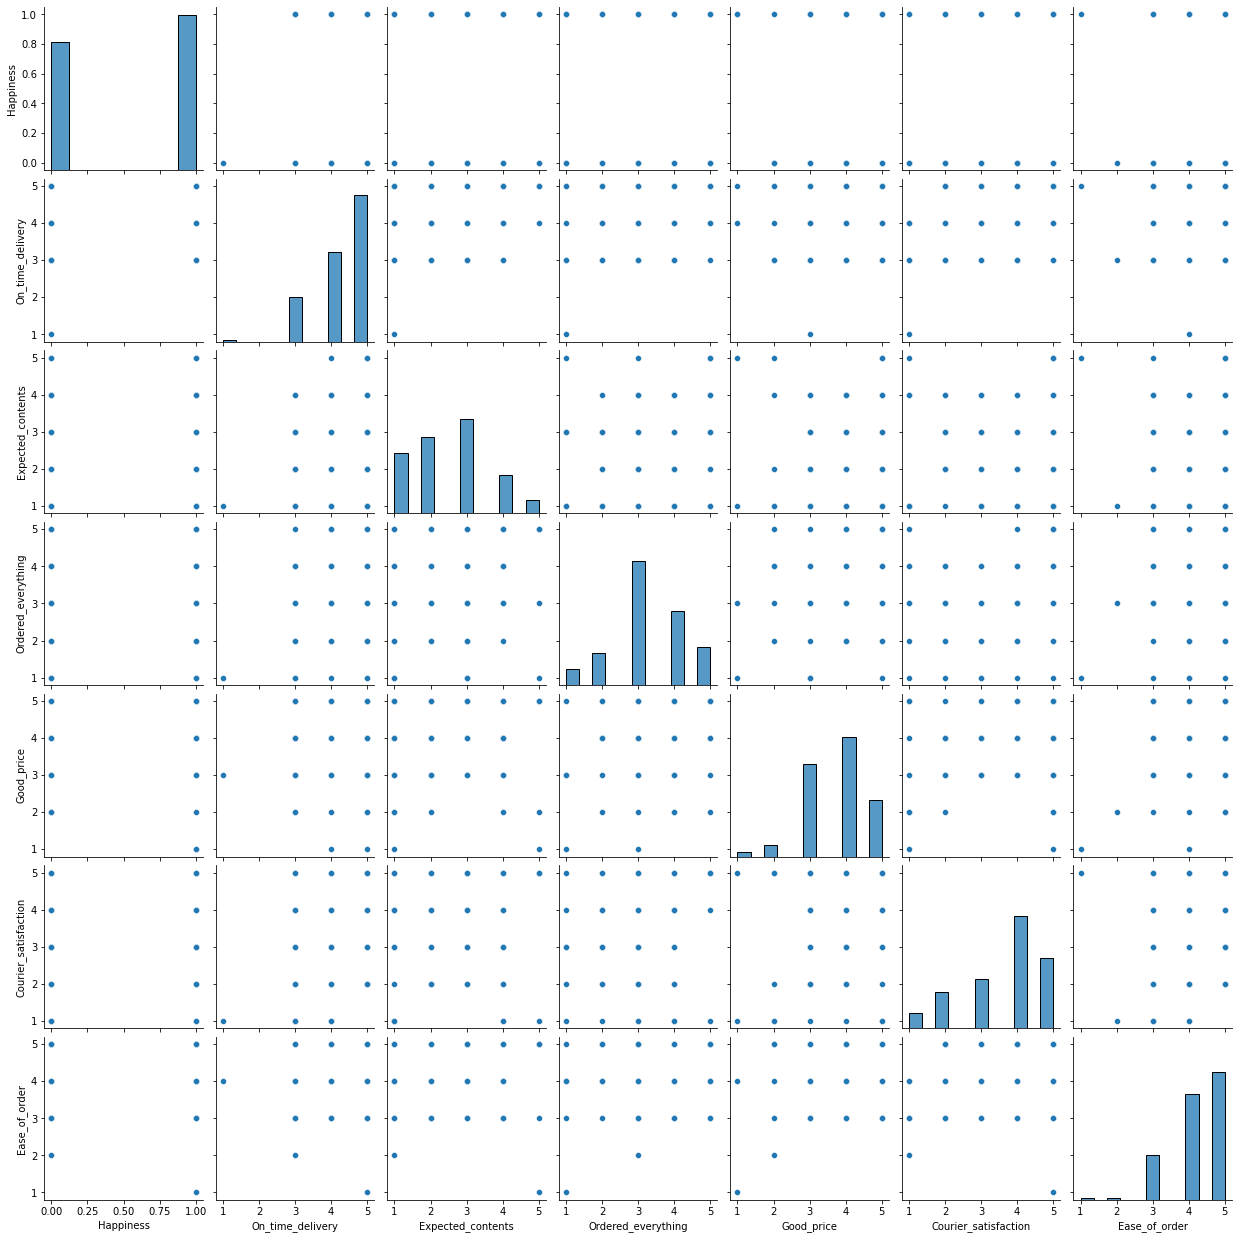

In [19]:
# Pair plot features and target
sns.pairplot(df)

What can we learn from the above plot? since pairploting of a variable with itself does not make sense, seaborn plot the distribution of the variable, as shown in the histograms plots of shown on the diagonal of the above plot. The pairplot does not reveal any clear correlation between the variables.

In [20]:
corr = df.corr()
#create an array of zeros like the corr dataframe
mask = np.zeros_like(corr)
#get indices of upper triangle of the mask array
triangle_indices = np.triu_indices_from(mask)
#assign upper traingle values of mask to True
mask[triangle_indices] = True

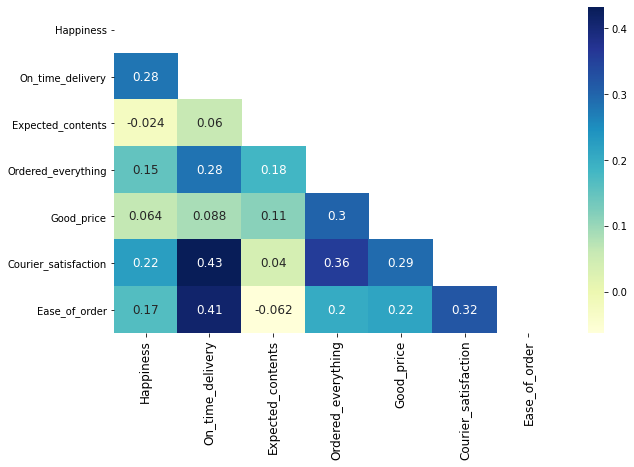

In [21]:
# set figure size
plt.figure(figsize=(10,6))
sns.heatmap(corr,mask=mask,annot=True,annot_kws={'size':12},cmap='YlGnBu')
plt.xticks(fontsize=12);

In [22]:
# Correlation significance is determined based on p-value = 0.005. 
corr[corr.Happiness >= 0.005].Happiness

Happiness              1.00
On_time_delivery       0.28
Ordered_everything     0.15
Good_price             0.06
Courier_satisfaction   0.22
Ease_of_order          0.17
Name: Happiness, dtype: float64

`On_time_delivery`, `Courier_satisfaction`, `Ordered_everything`, `Ease_of_Order`, and `Good_price` are positively correllated with customer happiness. `On_time_delivery` shows the highest correlation coeficient. What is surprising is `Good_price` has the least correlation with customer happiness. 

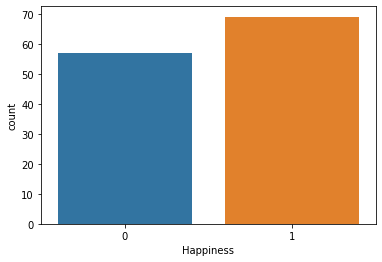

In [23]:
# Histogram plot of target class
sns.countplot(x='Happiness',data=df,label=True);

Though the dataset seems to be fairly balanced, we have small number of observations (126) and it would be a good idea to balance the dataset to increase the size of our small dataset. We will use SMOTE to balance our dataset and increase number of observations.

In [24]:
# plot the distribution of numerical columns using histograms
def plot_distribution(df,columns):
    sns.set()
    axes = []
    i=0

    while i<len(columns):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 4)
        sns.histplot(df[columns[i]],bins=15,color='blue',ax=ax1)
        ax1.set_xlabel(columns[i], fontsize=20)
        ax1.set_ylabel('Count', fontsize=20)
        try:
            sns.histplot(df[columns[i+1]],bins=15,color='blue',ax=ax2)
            ax2.set_xlabel(columns[i+1], fontsize=20)
            ax2.set_ylabel('Count', fontsize=20)
        except:
            print('Warning: Odd number of variables provided. One plot will be empty')
        i+=2
        axes.append(ax1)
        axes.append(ax2)
    return axes


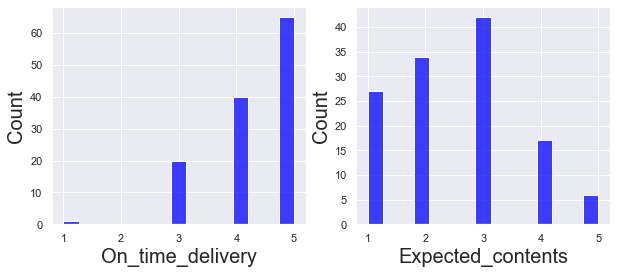

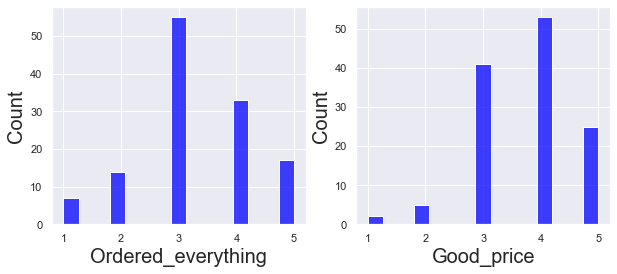

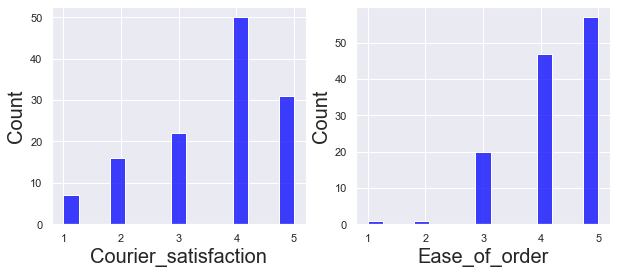

In [25]:
plot_distribution(df,new_column_names[1:]);

# Modeling

## Properly set the random seed for ML

Machine learning models make use of randomness in obvious and unexpected ways. At a conceptual level, this non-determinism may impact your model’s convergence rate, the stability of your results, and the final quality of a network.

At a practical level, it means that you probably have difficulty reproducing the same results across runs for your model — even when you run the same script on the same training data. It could also lead to challenges in figuring out whether a change in performance is due to an actual model or data modification, or merely the result of a new random sample.

### Where does randomness appear?
**1. Data preparation:** in the case of a neural network, the shuffled batches will lead to different loss values across runs. This means your gradient values will be different across runs, and you will probably converge to a different local minima For specific types of data like time-series, audio, or text data plus specific types of models like LSTMs and RNNs, your data’s input order can dramatically impact model performance.

**2. Data pre-processing:** Over or upsampling data when dealing with imbalanced dataset

**3. Cross Validation:** Both K-fold and leave one out cross validation (LOOCV)

**4. Weight initialization:** Weights often set randomly to [-1,1] or [0,1]

**5. Hidden layers:** Drop out layers randomly ignore subset of nodes

**6. Algorithms themselves:** Some models, such as Random Forest operate inherently on random selection


## Achieving Reproducibility (Dealing with the random problem)

To deal with the random problem (reproducibility problem) we follow the following steps.

In [26]:
# 1. set random seed value
seed_value = 47

os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

## Select dependent and independent features
The first column named `Happiness` represent the state of the customer (happy or not happy) while remaining 6 columns, which contain customer rating to different parts of the service. 

In [27]:
# dependent and independent features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [28]:
# check the shape of dependent and independent features
X.shape, y.shape

((126, 6), (126,))

In [61]:
# Apply the SMOTE oversampling method for handling the data imbalance
sm = SMOTE(sampling_strategy='auto')
X_sm, y_sm = sm.fit_resample(X, y)

In [62]:
# check the shape of the balanced dataset
X_sm.shape, y_sm.shape

((138, 6), (138,))

Using smote, we have added 12 synthetic observations (increased from 126 to 138)

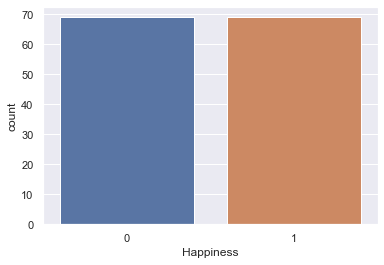

In [63]:
sns.countplot(x=y_sm,label=True);

The above plot shows dataset balanced with SMOTE

## Train/test split the data
In order to assess the predictive power of machine learning models it is important to split the data before training the model. The data split labeled as train is used to train the model, while the test split is reserved to assess the performance of the developed model. We splitted our dataset with train/test ratio of 80:20. 

In [64]:
# split the dataset into train/test split
from sklearn.model_selection import train_test_split
test_size= 0.1
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=test_size, random_state=seed_value)

In [65]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((124, 6), (124,), (14, 6), (14,))

# Use lazy predict to conduct initial experimentation with models. Based from the results of lazy predict report choose the top 3-5 models as base models.

Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

Free software: MIT license
Documentation: https://lazypredict.readthedocs.io.

In [66]:
lzy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state=seed_value)
lzy_models,predictions = lzy_clf.fit(X_train, X_test, y_train, y_test)

print(lzy_models)
print(type(lzy_models))


100%|██████████| 29/29 [00:00<00:00, 39.60it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DummyClassifier                    0.71               0.73     0.73      0.71   
AdaBoostClassifier                 0.64               0.67     0.67      0.64   
SGDClassifier                      0.64               0.67     0.67      0.64   
PassiveAggressiveClassifier        0.64               0.65     0.65      0.64   
DecisionTreeClassifier             0.64               0.62     0.62      0.64   
XGBClassifier                      0.64               0.62     0.62      0.64   
BaggingClassifier                  0.64               0.62     0.62      0.64   
NuSVC                              0.64               0.62     0.62      0.64   
LabelPropagation                   0.64               0.60     0.60      0.61   
GaussianNB                         0.57               0.58     0.58      0.57   
SVC                         

With lazy predict the maximum accuracy was obtained with Perceptron with an accuracy of 0.73 corresponding exactly to the required accuracy, but this is at the training stage. When using the test set the accuracy is expected to be less. Let's check if we have enough data for modeling. 

# Check whether we need more data

We need to check whether we have enough data and also decide what train-test split ratio seems to be optimal.

In [71]:
test_size= [0.05,0.1,0.2,0.22,0.3]
train_size = []
accuracy_vs_train_size = []
for tst_size in test_size:
    train_size.append(1 - tst_size)
    X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=tst_size, random_state=seed_value)
    lzy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state=seed_value)
    lzy_models,predictions = lzy_clf.fit(X_train, X_test, y_train, y_test)
    accuracy_vs_train_size.append(lzy_models.Accuracy.loc['DummyClassifier'])

100%|██████████| 29/29 [00:00<00:00, 36.64it/s]


In [72]:
accuracy_vs_train_size

[0.7142857142857143,
 0.7142857142857143,
 0.6785714285714286,
 0.6129032258064516,
 0.38095238095238093]

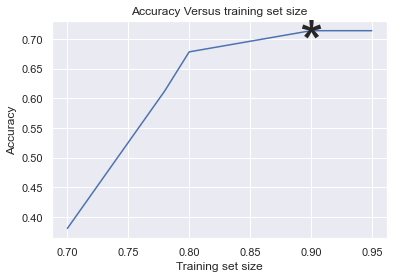

In [81]:
plt.plot(train_size,accuracy_vs_train_size)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Accuracy Versus training set size')
plt.text(0.89,0.66,'*',fontsize=60)
plt.show()

From the above plot we see that the optimal train/test split is 10/90. 

In [209]:
test_size= 0.15
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=test_size, random_state=seed_value)
lzy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state=seed_value)
lzy_models,predictions = lzy_clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:00<00:00, 38.50it/s]


In [210]:
lzy_models['accuracy_vs_time'] = lzy_models['ROC AUC']/lzy_models['Time Taken']
lzy_models;

Justify the choice of `AUC` score as a metric

In [211]:
lzy_models[['ROC AUC','accuracy_vs_time']].sort_values(by='ROC AUC',ascending=False)

,ROC AUC,accuracy_vs_time
Model,,
Perceptron,0.76,95.46
DummyClassifier,0.72,53.73
AdaBoostClassifier,0.72,9.23
NuSVC,0.71,46.89
QuadraticDiscriminantAnalysis,0.71,101.94
SGDClassifier,0.67,42.04
SVC,0.67,51.44
LGBMClassifier,0.67,27.56
RandomForestClassifier,0.66,3.83


Based on time and accuracy, the best performing three models are `Perceptron`, `NuSVC`,`QuadraticDiscriminantAnalysis`. We will also consider `LogisticRegression` and `RandomForestClassifier`

# Machine learning modeling
Now that we have prepared our dataset in the form that could be used by any machine learning algorithm, in this chapter we will train a number of classification machine learning alogorithms with grid search parameter optimization and cross validation for evaluation during the training stage. Best perfoming model selected based an appropriate model metric will be tested with the test set of our data set which was held back during model training. 

##### Classification models

The following list maching learning classification models will be tested.

- Logistic regression
- Random Forest
- Perceptron
- NuSVC
- QuadraticDiscriminantAnalysis

In [165]:
# Load the above ML modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.svm import NuSVC,SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [166]:
# Create a list containing the classification models to be used. 
models_list = []
models_list.append(('LR', LogisticRegression(random_state=seed_value)))
#models_list.append(('KNN', KNeighborsClassifier()))
#models_list.append(('DTREE', DecisionTreeClassifier(random_state=seed_value)))
#models_list.append(('XGBOOST',XGBClassifier(random_state=seed_value)))
models_list.append(('RF',RandomForestClassifier(random_state=seed_value)))
models_list.append(('PCPTRN',Perceptron(random_state=seed_value)))
models_list.append(('NSVC',NuSVC(random_state=seed_value)))
models_list.append(('QDA',QuadraticDiscriminantAnalysis()))

## K-fold training data split and cross-validation

Cross validation is an essential technique when using the training data. It opens up a better of use the training data set through multiple model evaluation (K-fold) during the training phase. It involves K-fold splitting of the training dataset where the training dataset is randomly split into K-folds or groups. During the training the first fold is kept for testing while the remaining `K-1` group are used for training. The training is repeated k times and each time a different split group is used for validation. However, it is worth noting that each fold should be a good representative of the whole training dataset. `Stratified K-fold` attempts to solve this issue by preserving class ratio when fold groups are created. 


In [233]:
# function for selecting a stratified or normal K-Fold depending on the value of is_stratified
    
def get_cross_validation_splitter(is_strattified=False):
    kfold= None
    if(not is_strattified):
        kfold = KFold(n_splits=3,shuffle=True, random_state=seed_value)
    else:
        kfold = StratifiedKFold(n_splits=3,shuffle=True, random_state=seed_value)
            
    return kfold

In [234]:
# Load necessary Modules
from sklearn.metrics import r2_score,classification_report,accuracy_score,roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold,learning_curve
from sklearn.model_selection import StratifiedKFold,cross_validate,GridSearchCV,RandomizedSearchCV

In [235]:
# call validation splitter function above
# return value of function SHOULD be assigned to variable kfold
kfold = get_cross_validation_splitter(is_strattified=True)

In [236]:
# Create dictionary containing model metrics
model_scores = {'Accuracy':'accuracy','Recall':'recall','Precision':'precision','f1-score':'f1',
                'AUC':'roc_auc'}
#model_scores = {'AUC':'roc_auc'}

In [237]:
# function to create model performance and return a dataframe of model performances.
def create_model_performance(x=X_train,y=y_train,models=models_list):
    model_names = []

    dict_model_performance = {}
    for name, model in models:
        results_c = []
        results_dict = {}
        model_sel = model
#        model_sel.fit(X_train,y_train)
        for score_name, score in model_scores.items():
# define how to split off validation data ('kfold' how many folds)
#        kfold = KFold(n_splits=5, random_state=Iseed)    
# train the model
#            model_sel = model
#            model_sel.fit(X_train,y_train)
            cv_results = cross_val_score(estimator=model_sel,X=X_train, y=y_train, cv=kfold, scoring=score)   
            results_c.append(cv_results)
            model_names.append(name)
#            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            results_dict[score_name] = float(round(cv_results.mean(),2))
#    print(msg)
        dict_model_performance[name] = results_dict
    model_performance_df = pd.DataFrame(dict_model_performance)
    return model_performance_df

In [238]:
def create_single_metric(x=X_train,y=y_train,models=models_list,score='roc_auc'):
    model_names = []

    dict_model_performance = {}
    for name, model in models:
        results_c = []
        results_dict = {}
        model_sel = model
#        model_sel.fit(X_train,y_train)
#        for score_name, score in model_scores.items():
# define how to split off validation data ('kfold' how many folds)
#        kfold = KFold(n_splits=5, random_state=Iseed)    
# train the model
#            model_sel = model
#            model_sel.fit(X_train,y_train)
        cv_results = cross_val_score(estimator=model_sel,X=X_train, y=y_train, cv=kfold, scoring=score)   
        results_c.append(cv_results)
        model_names.append(name)
#            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        results_score = float(round(cv_results.mean(),2))
#    print(msg)
        dict_model_performance[name] = cv_results
    model_performance_df = pd.DataFrame(dict_model_performance)
    return model_performance_df

In [239]:
model_performance_regular_kfold_df = create_model_performance()
print('Regular K-fold: Model Evaluation Metrics')
model_performance_regular_kfold_df.head(12)

Regular K-fold: Model Evaluation Metrics


,LR,RF,PCPTRN,NSVC,QDA
Accuracy,0.61,0.70,0.50,0.61,0.54
Recall,0.59,0.68,0.67,0.61,0.56
Precision,0.61,0.71,0.33,0.61,0.54
f1-score,0.60,0.69,0.44,0.61,0.55
AUC,0.62,0.72,0.62,0.64,0.54


#### Optimal hyperparameters for Random Forest
we will use GridSearchCV to tune the hyperparameters for the selected model (Random Forest). 

In [241]:
# Hyperparameters: Available hyperparameters for rf with default values are listed below
''' n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
warm_start=False, ccp_alpha=0.0, max_samples=None,
''';

In [242]:
# Initialize the hyper-parameters for random forest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 10)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [243]:
# Create the random grid
grid_random = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


print(grid_random)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


##### Instantiate the random forest class

In [310]:
rf = RandomForestClassifier(random_state=seed_value)

Since the search parameter space is large (12x2x6x5x4 = 1880), we should use RandomizeSearchCV

In [245]:
##### Instantiate the RandomizedSearchCV class

In [311]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid_random,scoring='accuracy', 
                               n_iter = 10, cv = kfold, verbose=0, random_state=seed_value, n_jobs = 1)

#rf_random = GridSearchCV(rf, param_grid=grid_param, scoring='roc_auc',
#                  n_jobs=None, refit=True, cv=kfold, verbose=1,
#                  pre_dispatch=None, error_score=np.nan,
#                  return_train_score=True)

In [181]:
##### Fit the above object  to search for optimal parameters

In [312]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=47, shuffle=True),
                   estimator=RandomForestClassifier(random_state=47), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=47, scoring='accuracy')

##### Evaluate random search 
To determine if random search yielded a better model, we compare the base model with the best random search model.

In [313]:
# get best rf obtained with randomized CV
best_rf_random = rf_random.best_estimator_
best_rf_random

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1100, random_state=47)

In [314]:
# Model performance of grid optimized random forest
create_model_performance(x=X_train,y=y_train,models=[('Best_RF_Random',best_rf_random)])

,Best_RF_Random
AUC,0.75
Accuracy,0.72
Precision,0.72
Recall,0.71
f1-score,0.72


In [315]:
# Get base model (rf with default parameters)
base_model_rf = RandomForestClassifier(random_state=seed_value)

In [316]:
# Model performance of base random forest
create_model_performance(x=X_train,y=y_train,models=[('Base RF',base_model_rf)])

,Base RF
AUC,0.72
Accuracy,0.70
Precision,0.71
Recall,0.68
f1-score,0.69


##### Compare best rf with base model rf with Cross Validation

From the above results we see that hyper-parameter optimization increased the AUC score from 0.72 to 0.75.

In [283]:
xgb_params= {'nthread':[10], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05], 
              'max_depth': [2],
              'min_child_weight':[1] ,
              'silent': [1],
              'subsample': [.89,.91,.895],
              'colsample_bytree':[.58,.585],
              'n_estimators': [1000],
             'seed': [27]}
             
xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(xgb,xgb_params,cv=10, n_jobs=-1, scoring = 'roc_auc',random_state = 42)

In [284]:
xgb_random.fit(X_train,y_train)

[11:14:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [285]:
# get best xgb obtained with randomized CV
best_xgb_random = xgb_random.best_estimator_
best_xgb_random

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.58, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=10, nthread=10, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=1, subsample=0.89, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [286]:
# Model performance of hyper-parameter optimized XGBoost
create_model_performance(x=X_train,y=y_train,models=[('Best XGB',best_xgb_random)]);

[11:15:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:15:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:15:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

Meeting notes:

1. Look at feature importances using tree based models
2. Learn about shapley analysis and feature contribution
3. Recursive feature elimination
4. Make a conclusion with insights (What you did, how you did it and what you can take from your results)
5. Properly set the random https://medium.com/@ODSC/properly-setting-the-random-seed-in-ml-experiments-not-as-simple-as-you-might-imagine-219969c84752
6. Update linkedIn and Add Apziva in resume
7. Introduce yourself on Slack


## Look at feature importance using Random Forest (tree based model)

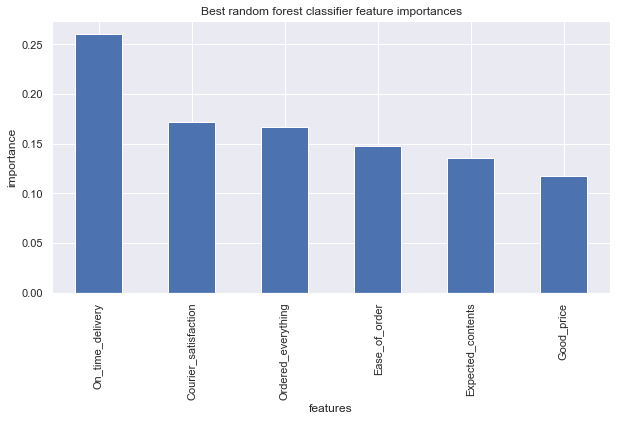

In [317]:
#Plot a barplot of the random forest's feature importances,
#print(len(X_train.columns))
plt.subplots(figsize=(10, 5))
imps = rf_random.best_estimator_.feature_importances_
#print(imps)
rf_feat_imps = pd.Series(imps, index=X.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');


From the above plot we see that the two most important features are `On_time_delivery` and `Ordered_everything`

## Recursive feature elimination

In [318]:
# import Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

In [319]:
# feature extraction, Random Forest

rfe = RFE(best_rf_random, 5)
fit = rfe.fit(X_train, y_train)

In [320]:
#the best features according to RFE have a ranking of 1, so we'll create a second model with those features.
selected_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':fit.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
0,On_time_delivery,1
1,Expected_contents,1
2,Ordered_everything,1
4,Courier_satisfaction,1
5,Ease_of_order,1
3,Good_price,2


## Modeling after recursive feature elimination (RFE)

In [321]:
# drop the 'easy_ordering_app' feature from train and test set
X_train_rfe = X_train.drop(columns=['Ease_of_order'])
X_test_rfe = X_test.drop(columns=['Ease_of_order'])

### Random Forest after RFE 

In [327]:
create_model_performance(x=X_train_rfe,y=y_train,models=[('RF_RFE',base_model_rf)])

,RF_RFE
AUC,0.72
Accuracy,0.70
Precision,0.71
Recall,0.68
f1-score,0.69


# Conclusion

In this project, we developed a supervised machine learning classification algorithm to predict customer state (happy or not happy) based on a survey data. Viewin, inspecting, and exploring the survey data revealed that customer state is almost divided equally (with 45% unhappy and 55% happy customer of the total 126 customers). We used SMOTE technique to balance the dataset and the final dataset after balancing consisted of a total of 138 customers with 50/50 happy/unhappy class ratio. On-time delivery and ease of use of the app was rated highly while low rating was provided to the expected contents of ordered materials. 

To narrow down the selection of candidate classification algorithms, LazyPredict library was employed. The LazyPredict library helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning. Based on the LazyClassifier output (selection based on time and accuracy), I selected three classifiers, namely: Perceptron, NuSVC, QuadraticDiscriminantAnalysis. In addition, I employed RandomForest, Logistic Regression, and XGBoost classifiers. 

Based on ROC AUC score, the best performing model after hyper-parameter tuning is Random Forest with ROC AUC score of 0.75. I have also used recursive feature elimination, but the ROC AUC score did not improve compared the base random forest model. 

Based on the feature importance of the Random Forest, the three most important features are `On_time_delivery`, `ordered_everything`, and `Courier Satisfaction`. It looks like customers are being uhappy due to late delivery and not being able to order everything they want. Some ordered items might be missing in delivery which may be an app problem which could be fixed.  

